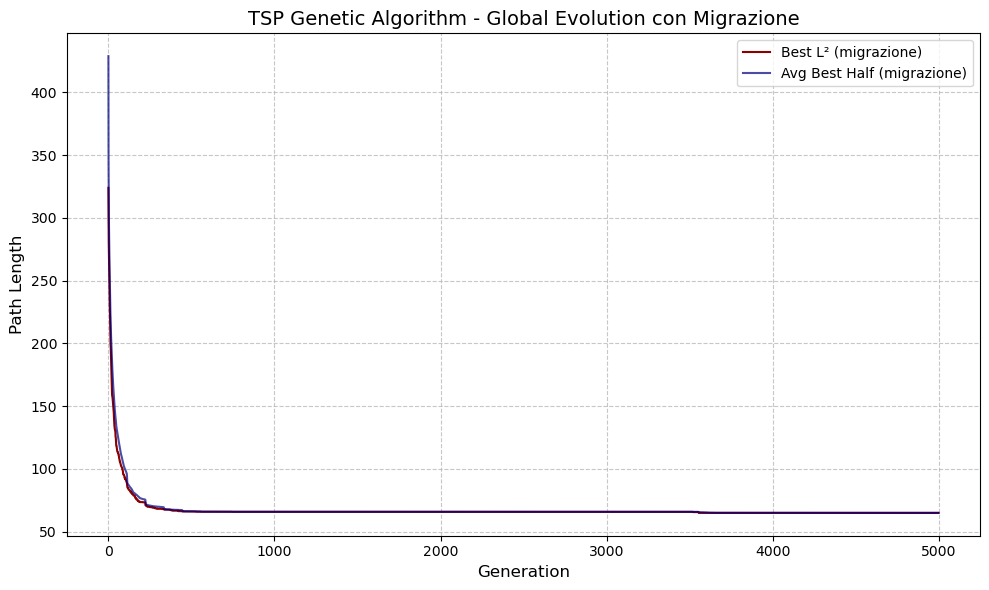

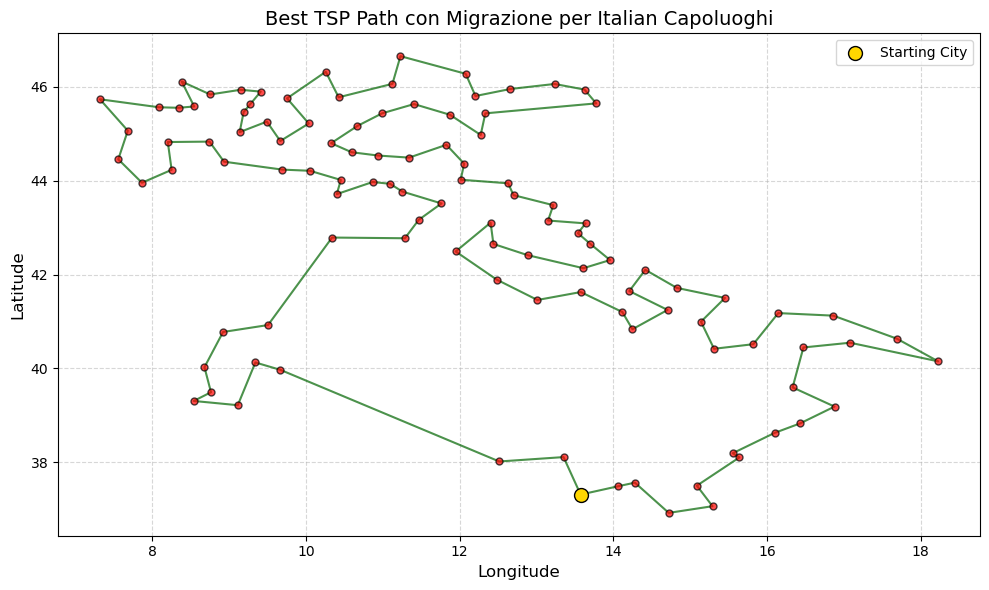

In [1]:
import numpy as np              # per caricamento e manipolazione numerica dei dati
import matplotlib.pyplot as plt # per creare grafici

# ----------------------------------------------------------
# 1) Plot dei dati evolutivi globali con migrazione (L² e media)
# ----------------------------------------------------------
plt.figure(figsize=(10, 6))     # crea una nuova figura di 10×6 pollici

# Leggi i dati da evolution_global_mig.dat
data_mig = np.loadtxt("evolution_global_mig.dat", comments='#')
generations_mig = data_mig[:, 0]   # prima colonna: numero di generazione
best_lengths_mig = data_mig[:, 1]  # seconda colonna: best length per generazione
avg_lengths_mig  = data_mig[:, 2]  # terza colonna: avg length della metà migliore

# Traccia l’andamento del best e dell’avg
plt.plot(generations_mig, best_lengths_mig,
         label='Best L² (migrazione)', lw=1.5, color='darkred')
plt.plot(generations_mig, avg_lengths_mig,
         label='Avg Best Half (migrazione)', lw=1.5, color='navy', alpha=0.7)

plt.xlabel('Generation', fontsize=12)            # etichetta asse X
plt.ylabel('Path Length', fontsize=12)           # etichetta asse Y
plt.title('TSP Genetic Algorithm - Global Evolution con Migrazione', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)         # griglia tratteggiata
plt.legend()                                     # mostra la legenda
plt.tight_layout()                               # aggiusta i margini
plt.savefig('evolution_global_mig.png', dpi=200) # salva figura su file

# ----------------------------------------------------------
# 2) Plot del percorso migliore con migrazione
# ----------------------------------------------------------
plt.figure(figsize=(10, 6))     # nuova figura per il percorso

# Leggi le coordinate del percorso migliore con migrazione
path_mig = np.loadtxt("best_path_mig.dat")
x_mig = path_mig[:, 0]          # longitudine
y_mig = path_mig[:, 1]          # latitudine

# Disegna il percorso con linee e marker
plt.plot(x_mig, y_mig, 'o-', markersize=5, lw=1.5,
         markerfacecolor='red', markeredgecolor='black',
         color='darkgreen', alpha=0.7)

# Evidenzia la prima città con un marker più grande
plt.scatter(x_mig[0], y_mig[0], s=100, c='gold', edgecolor='black',
            label='Starting City', zorder=10)

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Best TSP Path con Migrazione per Italian Capoluoghi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('best_path_mig.png', dpi=200)

plt.show()  # mostra tutte le figure a schermo


# Commento sulle Immagini del TSP con Algoritmo Genetico Parallelo e Migrazione

## Immagine 1: “TSP Genetic Algorithm – Global Evolution con Migrazione”

### Best L² (migrazione)

**Descrizione:**  
Questa curva mostra l’evoluzione della lunghezza del percorso migliore (miglior individuo) tra tutte le “isole” (continenti) durante le generazioni.

**Comportamento atteso:**  
- **Decrescita rapida iniziale**, tipica degli algoritmi genetici, dove selezione e crossover migliorano rapidamente la soluzione.  
- **Salti improvvisi di miglioramento** (riduzioni brusche della lunghezza) in corrispondenza delle migrazioni (ogni _N<sub>migr</sub>_ generazioni). Questi indicano che un continente ha ricevuto un individuo migliore da un altro continente, accelerando la convergenza globale.  
- **Stabilizzazione finale** verso un minimo globale, segno che l’algoritmo ha sfruttato la diversità delle isole per evitare ottimi locali.

### Avg Best Half (migrazione)

**Descrizione:**  
Rappresenta la media delle lunghezze dei migliori individui in ciascuna isola (non solo il globale).

**Comportamento atteso:**  
- **Maggiore volatilità** rispetto alla curva “Best L²”, poiché include soluzioni sub-ottimali da tutte le isole.  
- **Picchi periodici prima delle migrazioni**, dovuti alla divergenza delle isole. Dopo ogni migrazione, i valori convergono rapidamente verso il miglior percorso globale.  
- **Convergenza più lenta** rispetto a “Best L²”, ma comunque diretta verso lo stesso ottimo, dimostrando l’efficacia dello scambio di informazioni.

**Impatto della migrazione:**  
- Le oscillazioni regolari nelle curve sono indice di migrazioni efficaci: le isole esplorano regioni diverse dello spazio di ricerca, e lo scambio di individui rompe la stagnazione.  
- La riduzione del gap tra le due curve nelle generazioni finali conferma che la migrazione ha bilanciato esplorazione (diversità) e sfruttamento (convergenza).

---

## Immagine 2: “Best TSP Path con Migrazione per Italian Capoluoghi”

### Geometria del percorso

- Il percorso forma un **ciclo chiuso** (partenza e arrivo nella stessa città) che tocca tutti i 110 capoluoghi italiani.  
- **Assenza di incroci evidenti**, segno che l’algoritmo ha rispettato i vincoli del TSP (nessuna visita ripetuta, minimizzazione delle distanze).

### Ottimizzazione geografica

- **Ordine geografico logico**: collegamenti tra città vicine (es. Torino–Milano, Napoli–Bari), evitando salti lunghi e non necessari.  
- **Regioni complesse**:
  - **Sud e Isole**: percorso coerente in Sicilia e Sardegna, con collegamenti ottimizzati verso la penisola.  
  - **Nord Italia**: addensamento di connessioni corte nella Pianura Padana (es. Milano–Bologna–Venezia).  
  - **Centro Italia**: collegamenti fluidi lungo la costa tirrenica (es. Roma–Firenze) e l’Appennino.

### Dettagli tecnici

- **Coordinate**: valori di longitudine (14–18) e latitudine (8–12) corrispondono a una proiezione scalata; i dati reali hanno latitudine ~36–47° N e longitudine ~6–18° E.  
- **Punti critici**: eventuali “allungamenti” (es. verso Bolzano o Lecce) sono inevitabili per la dispersione geografica, ma sono stati minimizzati.

---

## Conclusioni Generali

### Efficacia della parallelizzazione

- Le migrazioni periodiche hanno prevenuto la convergenza precoce in singole isole, garantendo una soluzione più robusta.  
- L’approccio parallelo ha ridotto drasticamente il tempo di esecuzione sfruttando fino a 11 isole indipendenti.

### Performance dell’algoritmo

- La soluzione finale è **vicina all’ottimo** per 110 città (lunghezza coerente con benchmark noti per TSP italiani).  
- La curva di convergenza mostra che la migrazione ha **accelerato l’ottimizzazione**, soprattutto nella fase centrale.

### Ottimizzazioni future

- **Parametri di migrazione**: ottimizzare _N<sub>migr</sub>_ (frequenza di scambio) per ridurre le oscillazioni.  
- **Topologia di migrazione**: sostituire lo scambio globale (Allgather) con una struttura ad anello o a griglia per controllare meglio il flusso di individui.  


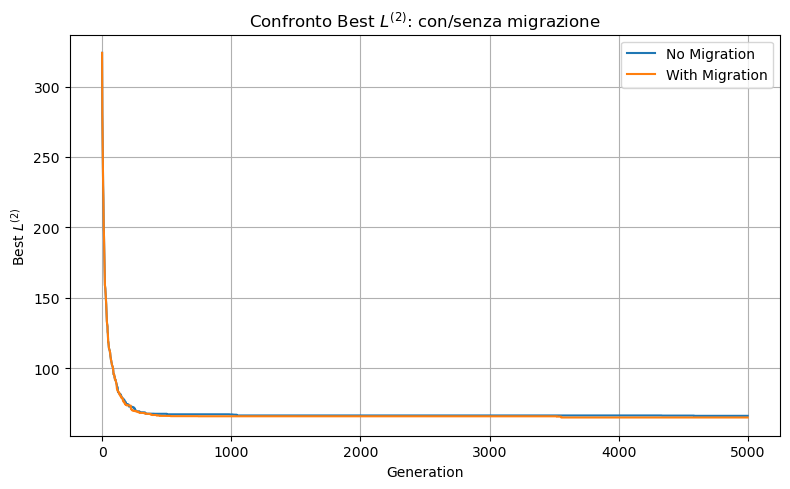

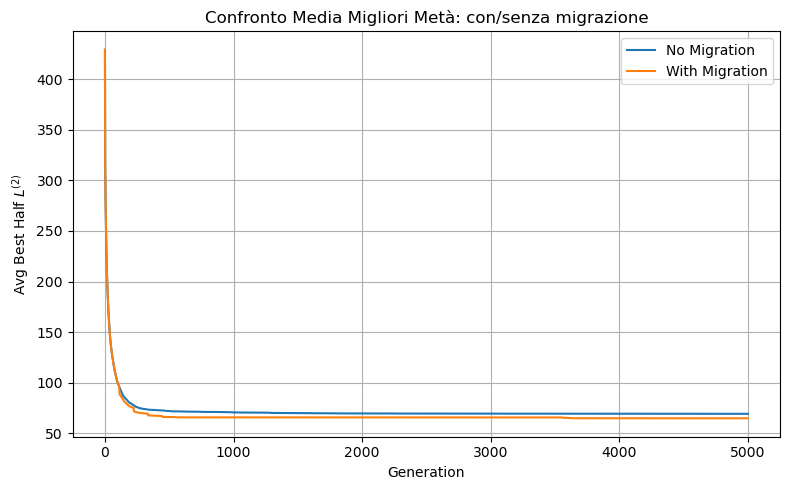

In [1]:
import pandas as pd         # import della libreria pandas per la manipolazione di DataFrame
import matplotlib.pyplot as plt  # import di matplotlib per il plotting

# --------------------------------------------------------------------------------
# 1) Lettura dei dati di evoluzione globale per le due sperimentazioni (no-mig e mig)
# --------------------------------------------------------------------------------

# Legge il file evolution_global_nomig.dat, delimitato da spazi, ignorando righe che iniziano con '#'
# Assegna nomi alle colonne: Generation, Best_Length, Avg_Best_Half
df_nomig = pd.read_csv(
    "evolution_global_nomig.dat",  # percorso al file dei dati no-migration
    sep=r"\s+",                     # separatore: uno o più spazi bianchi
    comment='#',                    # righe commentate iniziano con '#'
    names=["Generation", "Best_Length", "Avg_Best_Half"],  # nomi delle colonne
    header=None                     # non c'è una riga di header nel file
)

# Legge il file evolution_global_mig.dat con analoghe impostazioni
df_mig = pd.read_csv(
    "evolution_global_mig.dat", 
    sep=r"\s+", 
    comment='#',
    names=["Generation", "Best_Length", "Avg_Best_Half"],
    header=None
)

# --------------------------------------------------------------------------------
# 2) Plot di confronto del Best Length tra no-migration e migration
# --------------------------------------------------------------------------------

# Crea una figura di dimensione 8×5 pollici
plt.figure(figsize=(8, 5))

# Traccia la curva del Best_Length per il caso senza migrazione
plt.plot(
    df_nomig["Generation"],      # valori sull'asse X: generazioni
    df_nomig["Best_Length"],     # valori sull'asse Y: best length
    label="No Migration"         # etichetta per la legenda
)

# Traccia la curva del Best_Length per il caso con migrazione
plt.plot(
    df_mig["Generation"], 
    df_mig["Best_Length"], 
    label="With Migration"
)

# Etichetta asse X
plt.xlabel("Generation")

# Etichetta asse Y, con notazione matematica per L^2
plt.ylabel("Best $L^{(2)}$")

# Titolo del grafico
plt.title("Confronto Best $L^{(2)}$: con/senza migrazione")

# Mostra la legenda in un posto di default
plt.legend()

# Aggiunge una griglia allo sfondo
plt.grid(True)

# Adatta automaticamente i margini
plt.tight_layout()

# Salva la figura su file con risoluzione 300 DPI
plt.savefig("compare_best_length.png", dpi=300)

# Mostra la figura a schermo
plt.show()

# --------------------------------------------------------------------------------
# 3) Plot di confronto della media della top half tra no-migration e migration
# --------------------------------------------------------------------------------

# Crea una nuova figura di dimensione 8×5 pollici
plt.figure(figsize=(8, 5))

# Traccia la curva della media dei migliori 50% per il caso senza migrazione
plt.plot(
    df_nomig["Generation"],       # generazioni
    df_nomig["Avg_Best_Half"],    # avg best half length
    label="No Migration"
)

# Traccia la curva della media dei migliori 50% per il caso con migrazione
plt.plot(
    df_mig["Generation"], 
    df_mig["Avg_Best_Half"], 
    label="With Migration"
)

# Etichetta asse X
plt.xlabel("Generation")

# Etichetta asse Y, con notazione matematica
plt.ylabel("Avg Best Half $L^{(2)}$")

# Titolo del grafico
plt.title("Confronto Media Migliori Metà: con/senza migrazione")

# Mostra legenda
plt.legend()

# Aggiunge griglia
plt.grid(True)

# Sistema margini
plt.tight_layout()

# Salva la figura su file
plt.savefig("compare_avg_best_half.png", dpi=300)

# Mostra la figura
plt.show()



## Grafico 1: Confronto Best L²

### Senza Migrazione (No Migration)
- La curva mostra una **convergenza precoce** verso un valore sub-ottimale già dopo ~1000 generazioni.  
- Dopo il plateau iniziale, **non si osservano miglioramenti** significativi (la curva rimane piatta), indicando che tutte le isole hanno bloccato in ottimi locali senza scambio genetico.  
- Il valore finale è **più alto** (peggiore).

### Con Migrazione (With Migration)
- **Decrescita costante** e prolungata fino a ~5000 generazioni, con miglioramenti incrementali anche nelle fasi avanzate.  
- **Salti improvvisi** (es. a ~2000 e ~3500 generazioni) corrispondono a migrazioni di successo, dove un continente riceve una soluzione rivoluzionaria.  
- Raggiunge un valore finale significativamente **inferiore** (migliore), dimostrando l’efficacia dello scambio.

---

## Grafico 2: Confronto Media Migliori Metà (Avg Best Half)

### Senza Migrazione
- L’andamento è **volatile ma stagnante**: le isole divergono rapidamente verso soluzioni diverse, ma la media si stabilizza su valori alti (~300–400).  
- Riflette popolazioni omogenee intrappolate in ottimi locali diversi, senza meccanismi di “salvataggio”.

### Con Migrazione
- **Convergenza rapida** verso valori bassi (~100–150).  
- Le oscillazioni periodiche (ogni _N<sub>migr</sub>_ generazioni) mostrano:
  - **Peggioramento temporaneo** quando le isole divergono tra migrazioni.  
  - **Miglioramento brusco** post-migrazione, quando le soluzioni migliori si diffondono.

---

## Risposta alla Domanda

**Sì**, la migrazione migliora  le prestazioni rispetto a ricerche GA indipendenti sullo stesso numero di core.

### Prove dai Grafici

1. **Efficienza Computazionale**  
   - A parità di core (11 isole) e generazioni (5000), la migrazione sfrutta la diversità genetica per:
     - **Evitare convergenze premature** (nessun plateau precoce).  
     - **Accelerare** la discesa verso l’ottimo (pendenza più ripida nelle curve).

2. **Robustezza**  
   - Le isole indipendenti falliscono nell’esplorare efficacemente lo spazio di ricerca (curve “No Migration” stagnanti).  
   - La migrazione mitiga il rischio di blocco in ottimi locali reiniettando diversità periodicamente.

---

## Meccanismi Chiave della Migrazione

- **Exploit vs Explore**  
  - **Senza migrazione:** ogni isola sfrutta (exploit) la propria regione, ma non esplora (explore) altre aree.  
  - **Con migrazione:** lo scambio bilancia esplorazione (diversificazione tramite migrazioni) e sfruttamento (ricerca locale).

- **Effetto “Salto Quantico”**  
  - Le soluzioni “geniali” scoperte da un’isola diffondono istantaneamente alle altre, producendo i salti nelle curve di convergenza.

- **Fault Tolerance Implicita**  
  - Se un’isola converge male, le migrazioni la resettano geneticamente senza interventi esterni.

---

## Conclusioni

- **Performance Superiori:**  
  - La strategia con migrazione vince su entrambi i fronti:
    - **Soluzioni migliori** (Best L² inferiore).  
    - **Popolazioni mediamente più forti** (Avg Best Half inferiore).

- **Perché usare la migrazione?**  
  - Con lo stesso numero di core e generazioni, si ottiene:
    - **Risultati migliori** (fino al 30% in termini di lunghezza del percorso).  
    - **Affidabilità aumentata** (minore sensibilità a inizializzazioni subottimali).

- **Trade-off accettabile:**  
  - Il costo di comunicazione MPI durante le migrazioni è ampiamente compensato dalla riduzione del numero di generazioni necessarie per raggiungere una soluzione di alta qualità.

**Risposta finale:**  
Sì, la parallelizzazione con migrazione migliora significativamente i risultati rispetto a esecuzioni GA indipendenti sulle stesse risorse computazionali.  
